In [1]:
from scipy.io import loadmat
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
pth_vols = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\final_vols\stardist_files\backup\vols_with_stardist_volcell.mat'

In [3]:
def load_var_from_mat(mat_file_name, varname):

    try:
        data = loadmat(mat_file_name)

        var = data[varname]
    except:
        data = h5py.File(mat_file_name, 'r')

        var = data[varname][()]

    return var

In [4]:
volcell = load_var_from_mat(pth_vols, 'volcell')
volfinal = load_var_from_mat(pth_vols, 'volfinal')

In [5]:
print(np.shape(volcell))
print(np.shape(volfinal))

(1154, 4091, 3161)
(1154, 4091, 3161)


In [6]:
volcell = np.transpose(volcell, (1, 2, 0))
volfinal = np.transpose(volfinal, (1, 2, 0))

In [7]:
print(np.shape(volcell))
print(np.shape(volfinal))

(4091, 3161, 1154)
(4091, 3161, 1154)


In [12]:
np.unique(volcell)

array([0, 1], dtype=uint8)

In [13]:
counts = volfinal * volcell

In [14]:
unique_labels = np.unique(counts)

In [15]:
unique_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71], dtype=uint8)

In [16]:
counts_dict = {key: 0 for key in unique_labels}

In [17]:
print(counts_dict)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0}


In [18]:
flattened_counts = counts.flatten()

In [19]:
for key in counts_dict:
    print(key)
    if key == 0:  # noise class
        counts_dict[key] = np.array([], dtype=np.int64)
    else:
        num = np.where(flattened_counts == key)[0]  # add [0] because for some reason it np.where returns it as list of list
        counts_dict[key] = num

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71


In [20]:
total_sum = 0
for key in counts_dict:
    total_sum += len(counts_dict[key])
    print(f'{key}: {len(counts_dict[key])}')
print(f'total sum: {total_sum}')

0: 0
1: 14811677
2: 11375105
3: 5378357
4: 204839
5: 303160
6: 13150750
7: 38954959
8: 18245569
9: 3155684
10: 42165866
11: 2245069
12: 2411474
13: 120069
14: 217529
15: 4813781
16: 2095760
17: 377948
18: 1429242
19: 141347
20: 78837
21: 16740
22: 10257
23: 10044
24: 13731
25: 1777458
26: 878368
27: 660088
28: 186825
29: 491697
30: 719323
31: 169663
32: 4481921
33: 1703000
34: 525574
35: 1556420
36: 300078
37: 439465
38: 752555
39: 59074867
40: 420321
41: 16882
42: 949830
43: 745151
44: 88018
45: 123148
46: 208320
47: 419587
48: 191865
49: 144967
50: 476336
51: 316420
52: 150292
53: 153645
54: 60655
55: 211269
56: 17005
57: 12674203
58: 100033466
59: 6733393
60: 34886674
61: 30145178
62: 319696
63: 262476
64: 287278
65: 52184
66: 591231
67: 139060
68: 140632
69: 25175
70: 63850
71: 11344733
total sum: 437838036


In [21]:
import pickle

pth_save = r'\\10.99.68.178\andreex\students\Donald Monkey fetus\data\counts_dict.pkl'

with open(pth_save, 'wb') as f:
    pickle.dump(counts_dict, f)

In [10]:
import pickle
pth_save = r'\\10.99.68.178\andreex\students\Donald Monkey fetus\data\counts_dict.pkl'

with open(pth_save, 'rb') as f:
    x = pickle.load(f)

In [ ]:
total_sum = 0
for key in x:
    total_sum += len(x[key])
    print(f'{key}: {len(x[key])}')
print(f'total sum: {total_sum}')

In [24]:
pth_pickle_features = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_feature_df_pickles'
feature_pickle_files = os.listdir(pth_pickle_features)

In [25]:
z = 100
for i,_ in enumerate(flattened_counts):
    if i % (4091 * 3161) == 0:
        z += 1
        with open(os.path.join(pth_pickle_features, feature_pickle_files[z]), 'rb') as f:
            df = pickle.load(f)
        print(z)
        break

101


In [38]:
os.path.join(pth_pickle_features, feature_pickle_files[z])

'\\\\10.162.80.16\\Andre_expansion\\data\\monkey_fetus\\Stardist\\StarDist_12_25_23\\stardist_feature_df_pickles\\monkey_fetus_40_0103.pkl'

In [26]:
df.head()

,Centroid_x,Centroid_y,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,extent,form_factor,maximum_radius,mean_radius,median_radius,minor_axis_length,orientation_degrees,r_mean_intensity,g_mean_intensity,b_mean_intensity
0,3742.0,1934.0,71.3125,33.96875,0.776855,2.101562,16.171875,0.879395,0.750000,1.287109,6.953125,4.621094,4.453125,6.726562,5088.000,173.125,173.1250,175.750
1,2142.0,2790.0,228.3750,62.59375,0.732422,2.593750,17.156250,0.922852,0.753418,1.365234,16.390625,7.933594,7.277344,10.812500,9976.000,202.750,201.6250,202.625
2,1828.0,2636.0,78.1875,41.65625,0.566895,3.484375,22.171875,0.958008,0.660156,1.764648,9.562500,4.492188,3.423828,5.832031,4828.000,161.125,157.6250,159.625
3,330.0,1722.0,417.2500,85.87500,0.711426,2.849609,17.671875,0.936523,0.756348,1.406250,18.796875,10.882812,9.429688,13.914062,10224.000,124.375,121.0625,118.125
4,3108.0,1674.0,304.7500,74.37500,0.692383,3.011719,18.156250,0.943359,0.758789,1.444336,16.781250,9.226562,7.855469,11.546875,34.125,126.750,126.4375,121.375


IndexError: positional indexers are out-of-bounds

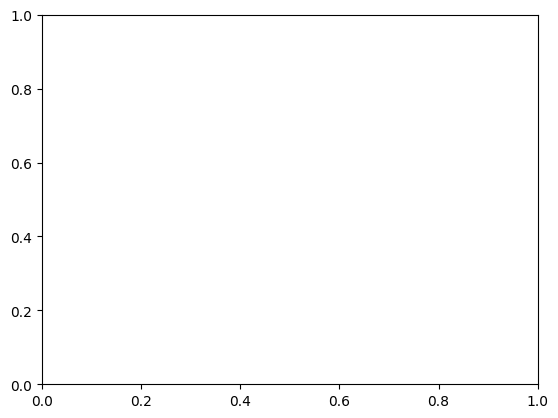

In [54]:
label = 7

# range_points = counts_dict[label]

d1 = volcell.shape[0] * volcell.shape[1] * z
d2 = volcell.shape[0] * volcell.shape[1] * (z+1)

range_points = [(x - d1) for x in counts_dict[label] if (x - d1) >= 0 and (x-d1) < d2]

# plt.scatter(df.iloc[:,'Centroid_x'], df.iloc[:,'Centroid_x'])
fig, ax = plt.subplots(1, 1)  # Create a figure and an Axes object
ax.scatter(df.iloc[range_points]['Centroid_x'], df.iloc[range_points]['Centroid_y'], c='red', marker='o', s=1)
ax.invert_yaxis()

In [49]:
len(df)

180679

In [55]:
range_points

[1455980,
 1457134,
 1458279,
 1458287,
 1459433,
 1460595,
 1461741,
 1461746,
 1461750,
 1464049,
 1464057,
 1465208,
 1466359,
 1466363,
 1467513,
 1468673,
 1469827,
 1470981,
 1472131,
 1472133,
 1473287,
 1473289,
 1473292,
 1474435,
 1474442,
 1475593,
 1475597,
 1476744,
 1476750,
 1477903,
 1479059,
 1479062,
 1480206,
 1480207,
 1480212,
 1480213,
 1480215,
 1481357,
 1481364,
 1481365,
 1482514,
 1482515,
 1482517,
 1482521,
 1482523,
 1483669,
 1483671,
 1483674,
 1484822,
 1484832,
 1484833,
 1485973,
 1485980,
 1485982,
 1485983,
 1485986,
 1487124,
 1487127,
 1487129,
 1487131,
 1487133,
 1487135,
 1487141,
 1488281,
 1488284,
 1488287,
 1489436,
 1489442,
 1489449,
 1489475,
 1490586,
 1490592,
 1490596,
 1490597,
 1490598,
 1490600,
 1491741,
 1491743,
 1491744,
 1491747,
 1491749,
 1492898,
 1492899,
 1492901,
 1492903,
 1492904,
 1492907,
 1492911,
 1494049,
 1494059,
 1494062,
 1494063,
 1495206,
 1495209,
 1495212,
 1495216,
 1495223,
 1496357,
 1496362,
 1496368,


In [57]:
sum(flattened_counts[range_points])/len(flattened_counts[range_points])

0.05052587621741765